正在初始化 Etherscan Client...
正在向以太坊主網查詢地址: 0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D ...
正在抓取地址 0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D 的內部交易...
✅ 成功獲取 381 筆內部交易
✅ 成功獲取 381 筆交易


/Users/weichenwu/Quantum-Graph-AML-Detection/src/eth_client.py:45: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')


,blockNumber,timeStamp,hash,from,to,value,contractAddress,input,type,gas,gasUsed,traceId,isError,errCode
0,18500000,2023-11-04 16:55:59,0x1fafb1edf72f30a5db7835421d0869d155d9a4cf53d0...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.042500,,,call,853562,23974,0_1,0,
1,18500000,2023-11-04 16:55:59,0xdd844d9aa75dba8285d5def124da781d539a1806ddfb...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.225053,,,call,213742,23974,0_1,0,
2,18500001,2023-11-04 16:56:11,0xabc0be5f950d6c365f9a7e6d9d33f8c948eed48f6712...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.269902,,,call,2300,83,0_1_1_1_1,0,
3,18500001,2023-11-04 16:56:11,0xabc0be5f950d6c365f9a7e6d9d33f8c948eed48f6712...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x00000000051b48047be6dc0ada6de5c3de86a588,0.269902,,,call,279924,55,0_1_1_1,0,
4,18500001,2023-11-04 16:56:11,0xc9d441dadf7438bcb763e8c148c801e6db679ccd6600...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.063882,,,call,2300,83,0_1_1_1_1_1,0,


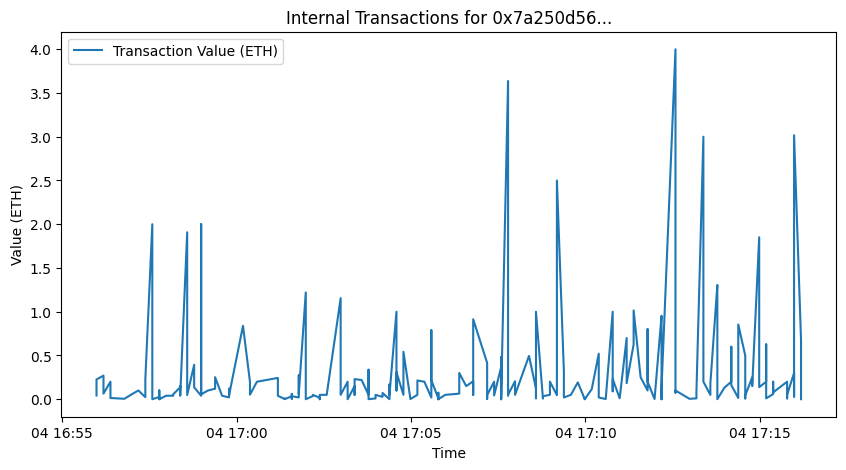

In [ ]:
# ==============================================================================
# 04_Etherscan_Data_Integration.ipynb
# ==============================================================================
# 本 Notebook 展示如何介接 Etherscan API 獲取真實鏈上資料
# 這證明了本計畫具備處理「即時動態資料」的能力，而非僅依賴靜態資料集。

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定路徑
sys.path.append(os.path.abspath('..'))

from src.eth_client import EtherscanClient


print("正在初始化 Etherscan Client...")
# 注意：為了 Demo 方便，這裡可以使用免費的 API Key，或者留空 (會有速率限制)
# 建議您去 https://etherscan.io/myapikey 申請一個免費的填入下面
#API_KEY = "YOUR API KEY" 
#client = EtherscanClient(api_key=API_KEY)

# 初始化 (會自動讀取 .env)
client = EtherscanClient()

# ==============================================================================
# 1. 抓取 Uniswap V2 Router 的內部交易
# ==============================================================================
# 這是一個高頻互動的 DeFi 合約，充滿了大量的 swap 操作
target_address = "0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D"

print(f"正在向以太坊主網查詢地址: {target_address} ...")
# 為了節省時間，我們只抓取最近的區塊 (假設從區塊 18,000,000 開始)
df = client.get_internal_transactions(target_address, start_block=18500000, end_block=18500100)

if not df.empty:
    print(f"✅ 成功獲取 {len(df)} 筆交易")
    display(df.head())
    
    # ==============================================================================
    # 2. 簡單的資料視覺化
    # ==============================================================================
    plt.figure(figsize=(10, 5))
    plt.plot(df['timeStamp'], df['value'], label='Transaction Value (ETH)')
    plt.title(f"Internal Transactions for {target_address[:10]}...")
    plt.xlabel("Time")
    plt.ylabel("Value (ETH)")
    plt.legend()
    plt.show()
else:
    print("⚠️ 未抓取到資料，請檢查 API Key 或網路連線。")

In [53]:
import sys
import os
import importlib

# 1. 設定路徑
sys.path.append(os.path.abspath('..'))

# 2. 匯入模組
import src.eth_client as eth_module

# 3. 🔥【關鍵】強制重新載入最新版檔案 (Reload)
importlib.reload(eth_module)

# 4. 再從重新載入的模組中拿 Class
from src.eth_client import EtherscanClient

print("✅ 已強制重新載入 eth_client.py，現在應該能看到新代碼的效果了！")

✅ 已強制重新載入 eth_client.py，現在應該能看到新代碼的效果了！


In [ ]:
API_KEY = "NXYQ5DV5QH21RWU39AS8S984A3W37M81R6" 
client = EtherscanClient(api_key=API_KEY)

target_address = "0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D"

# 這裡傳入 end_block 現在不會報錯了
df = client.get_internal_transactions(target_address, start_block=17000000, end_block=17000100)

if not df.empty:
    display(df.head())
    print("🎉 恭喜！資料抓取成功！")
else:
    print("⚠️ 依然沒有資料，請確認 API Key 是否複製正確")

🚀 [新版代碼] 正在向 Etherscan V2 請求地址: 0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D...
✅ 成功獲取 539 筆交易！


/Users/weichenwu/Quantum-Graph-AML-Detection/src/eth_client.py:43: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')


,blockNumber,timeStamp,hash,from,to,value,contractAddress,input,type,gas,gasUsed,traceId,isError,errCode
0,17000000,2023-04-07 23:58:11,0x3b72731ebb4192b8307641d480078ffaaa362402f11e...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.218144,,,call,2300,83,0_1_1_1_1,1,
1,17000000,2023-04-07 23:58:11,0x3b72731ebb4192b8307641d480078ffaaa362402f11e...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xb846f231b102f98e727d2b9403822025f53a16c9,0.218144,,,call,205065,55,0_1_1_1,1,
2,17000000,2023-04-07 23:58:11,0x1576959ae5d791619bac071d02b45c60de8e26415af9...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.218144,,,call,2300,83,0_1_1_1_1,0,
3,17000000,2023-04-07 23:58:11,0x1576959ae5d791619bac071d02b45c60de8e26415af9...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xb846f231b102f98e727d2b9403822025f53a16c9,0.218144,,,call,134870,55,0_1_1_1,0,
4,17000000,2023-04-07 23:58:11,0x6bba32cb5223aca1698e9daa51f3337e6a4da045e94c...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.002555,,,call,2300,83,0_1_1_1_1_1,0,


🎉 恭喜！數據抓取成功！


In [45]:
import requests

# 1. 設定參數
url = "https://api.etherscan.io/v2/api"
params = {
    "chainid": "1",          # V2 必填：主網 ID
    "module": "account",
    "action": "txlistinternal",
    "address": "0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D", # Uniswap Router
    "startblock": "17000000",
    "endblock": "17000099",  # 縮小範圍，確保回應快
    "sort": "asc",
    "apikey": "NXYQ5DV5QH21RWU39AS8S984A3W37M81R6" # 請填入您的 Key
}

print("🚀 開始發送請求...")

# 2. 發送請求
try:
    r = requests.get(url, params=params)
    
    # 3. 強制印出所有內容 (不管成功失敗)
    print("\n⬇️⬇️⬇️ 伺服器回傳內容 ⬇️⬇️⬇️")
    print(r.text) 
    print("⬆️⬆️⬆️ 伺服器回傳結束 ⬆️⬆️⬆️")

except Exception as e:
    print(f"❌ 連線發生嚴重錯誤: {e}")

🚀 開始發送請求...

⬇️⬇️⬇️ 伺服器回傳內容 ⬇️⬇️⬇️
{"status":"1","message":"OK","result":[{"blockNumber":"17000000","timeStamp":"1680911891","hash":"0x3b72731ebb4192b8307641d480078ffaaa362402f11ee491022ee5fb0672db02","from":"0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2","to":"0x7a250d5630b4cf539739df2c5dacb4c659f2488d","value":"218144101444544661","contractAddress":"","input":"","type":"call","gas":"2300","gasUsed":"83","traceId":"0_1_1_1_1","isError":"1","errCode":""},{"blockNumber":"17000000","timeStamp":"1680911891","hash":"0x3b72731ebb4192b8307641d480078ffaaa362402f11ee491022ee5fb0672db02","from":"0x7a250d5630b4cf539739df2c5dacb4c659f2488d","to":"0xb846f231b102f98e727d2b9403822025f53a16c9","value":"218144101444544661","contractAddress":"","input":"","type":"call","gas":"205065","gasUsed":"55","traceId":"0_1_1_1","isError":"1","errCode":""},{"blockNumber":"17000000","timeStamp":"1680911891","hash":"0x1576959ae5d791619bac071d02b45c60de8e26415af9bb62756ac2b1d2030670","from":"0xc02aaa39b223fe8d0a0e5c4f2

In [ ]:
import requests
import json
import time

# ==========================================
# 請填入您剛申請的全新 API Key
# ==========================================
MY_API_KEY = "NXYQ5DV5QH21RWU39AS8S984A3W37M81R6" 
# ==========================================

def debug_etherscan():
    print(f"🔑 正在測試 API Key: {MY_API_KEY[:4]}******{MY_API_KEY[-4:]}")
    
    # -------------------------------------------------------
    # 測試 1: 最簡單的「餘額查詢」 (用來驗證 Key 是否有效)
    # -------------------------------------------------------
    print("\n[測試 1] 正在檢查 API Key 有效性 (查詢 ETH 餘額)...")
    target_address = "0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D" # Uniswap V2 Router
    
    url_balance = "https://api.etherscan.io/v2/api"
    params_balance = {
        "chainid": "1",
        "module": "account",
        "action": "balance",
        "address": target_address,
        "tag": "latest",
        "apikey": MY_API_KEY
    }
    
    try:
        r = requests.get(url_balance, params=params_balance)
        data = r.json()
        print(f"⬇️ 伺服器回傳: {json.dumps(data, indent=2)}")
        
        if data['status'] == '1':
            print("✅ API Key 運作正常！連線成功。")
        else:
            print("❌ API Key 測試失敗！請檢查 Key 是否複製正確，或是否剛申請還沒生效。")
            return # 如果 Key 壞了，後面不用測了
            
    except Exception as e:
        print(f"❌ 連線發生嚴重錯誤: {e}")
        return

    # -------------------------------------------------------
    # 測試 2: 內部交易 (移除 start_block 限制)
    # -------------------------------------------------------
    print("\n[測試 2] 正在嘗試抓取 Internal Transactions (不設區塊限制)...")
    time.sleep(1) # 休息一下避免觸發速率限制
    
    params_tx = {
        "chainid": "1",
        "module": "account",
        "action": "txlistinternal",
        "address": target_address,
        "startblock": 0,      # 改成 0，確保抓全量
        "endblock": 99999999,
        "page": 1,            # 分頁：第 1 頁
        "offset": 5,          # 只抓 5 筆試試看
        "sort": "desc",       # 抓最新的
        "apikey": MY_API_KEY
    }
    
    try:
        r = requests.get(url_balance, params=params_tx)
        data = r.json()
        
        # 這裡會印出完整的錯誤訊息
        print(f"⬇️ 伺服器回傳: {data.get('message')}")
        print(f"⬇️ 資料結果: {str(data.get('result'))[:200]}...") # 只印前200字避免洗版
        
        if data['status'] == '1':
            print(f"✅ 成功！抓到了 {len(data['result'])} 筆資料。")
        else:
            print("⚠️ 依然抓不到資料。請看上方的 message 和 result 欄位。")
            
    except Exception as e:
        print(f"❌ 錯誤: {e}")

if __name__ == "__main__":
    if len(MY_API_KEY) < 20:
        print("❌ 您忘記填入 API Key 了！")
    else:
        debug_etherscan()

🔑 正在測試 API Key: NXYQ******81R6

[測試 1] 正在檢查 API Key 有效性 (查詢 ETH 餘額)...
⬇️ 伺服器回傳: {
  "status": "1",
  "message": "OK",
  "result": "25000000000000000"
}
✅ API Key 運作正常！連線成功。

[測試 2] 正在嘗試抓取 Internal Transactions (不設區塊限制)...
⬇️ 伺服器回傳: OK
⬇️ 數據結果: [{'blockNumber': '24162069', 'timeStamp': '1767538979', 'hash': '0x112bff379a75e9d64e95cffed40727bf82faaf9bb0f65b3077a28e320f53b33e', 'from': '0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 'to': '0x1cc...
✅ 成功！抓到了 5 筆資料。
